In [1]:
import sys
sys.path.append("../..")

In [2]:
from libraries.dataManipulation import *
from libraries.gridManipulation import *

In [3]:
#GRID CONFIGURATION IS DECLARED
o_x = 5000
o_y = -10000
o = (o_x,o_y)

patch_width = 3750
patch_height = 3750
patch_size = (patch_width, patch_height)

total_patches = (18,4)
abs_total_patches = total_patches[0]*total_patches[1]

grid_angle = 0.9

trying to fetch: /storage/surfsara/ProRail_USE_LL_data/ehv/background_images/EHV.Perron2.1_multisensor.png
background fetched. Accessible as <this-object>.bg


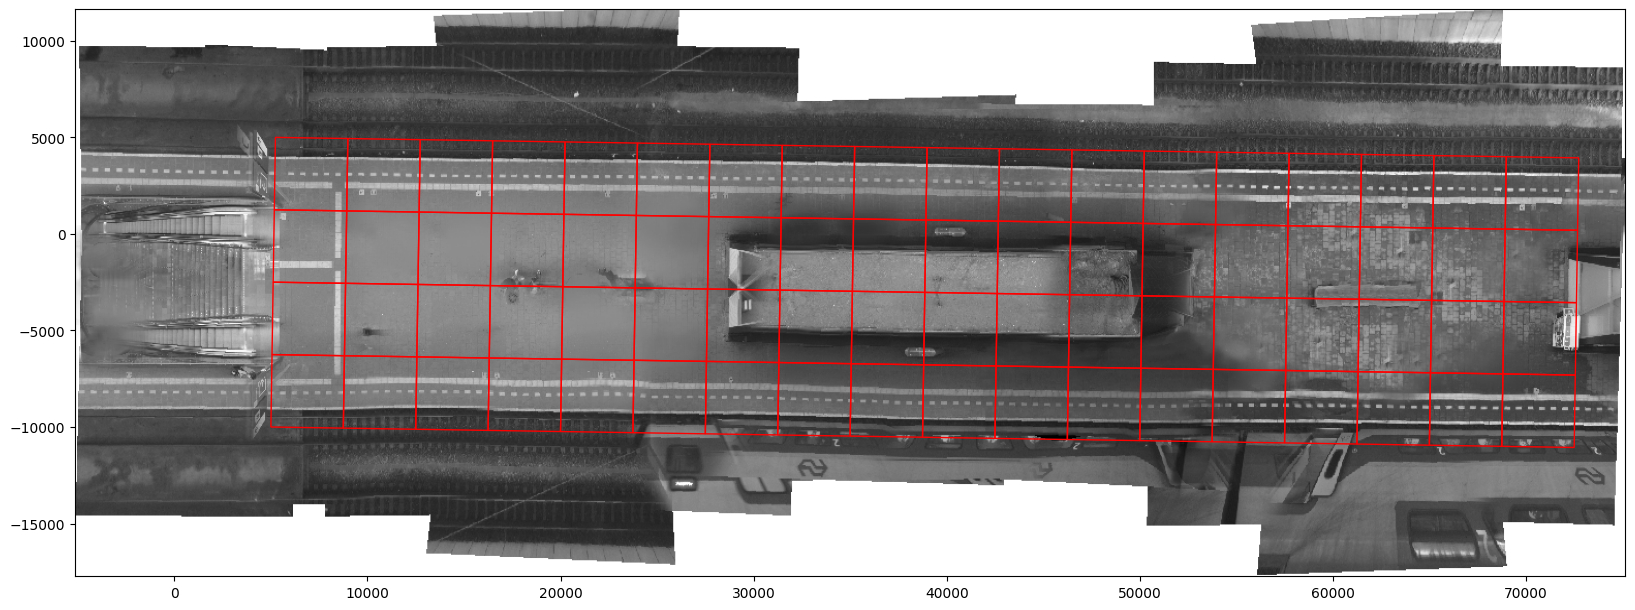

In [4]:
#GRID IS CREATED USING CONFIG
grid = create_grid(o, patch_size, total_patches, grid_angle)
#GRID IS PLOTTED ON STATION
plot_grid(grid, 'ehv')

In [21]:
# Storage connection class
dh = SociophysicsDataHandler()

daylist = dh.list_files('/ehv/platform2.1')['name']
day_numbers = []
for i in range(len(daylist)):
    day_numbers.append(int(daylist[i]))

targeting path /storage/surfsara/ProRail_USE_LL_data//ehv/platform2.1
Files listed. Accessible as <this-object>.filelist


In [39]:
%%time
%%capture
#data = getHours(0,2,20210330, 'ehv')
data = getDay(20220320, 'ehv')

data = data.drop(data[data.x_pos < o_x].index)
data = data.drop(data[data.y_pos < o_y].index)
data = data.drop(data[data.x_pos > (total_patches[0]-1)*patch_width].index)
data = data.drop(data[data.y_pos > (total_patches[1]-1)*patch_height].index)

data = data.drop(['date_time_utc'], axis=1)

CPU times: user 16.3 s, sys: 2.18 s, total: 18.5 s
Wall time: 21.8 s


In [42]:
data

,tracked_object,y_pos,x_pos,datetime
0,3625345,-2609.0,62330.0,2022-03-20 00:00:00+01:00
1,3625359,1184.0,14600.0,2022-03-20 00:00:00+01:00
2,3625382,-3057.0,59640.0,2022-03-20 00:00:00+01:00
4,3625508,1804.0,13022.0,2022-03-20 00:00:00+01:00
5,3625510,-215.0,22081.0,2022-03-20 00:00:00+01:00
...,...,...,...,...
19974616,3666307,-4962.0,62766.0,2022-03-20 23:59:59.800000+01:00
19974617,3666362,1803.0,63683.0,2022-03-20 23:59:59.800000+01:00
19974618,3666228,-3333.0,60091.0,2022-03-20 23:59:59.900000+01:00
19974620,3666307,-4949.0,62837.0,2022-03-20 23:59:59.900000+01:00
